#### Iiris Decision tree

**Name:** Manuel Ibañez Salazar

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Dataset


In [3]:
df = pd.read_csv('iris.csv')
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Exploratory Data Analysis

In [5]:
df.shape

(150, 5)

In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

##### se realizaron las siguientes visualizaciones, para comprender de una mejor forma lo que viene siendo iris en cuestion a lo siguiente

##### 1. Pairplot para observar la separación entre clases

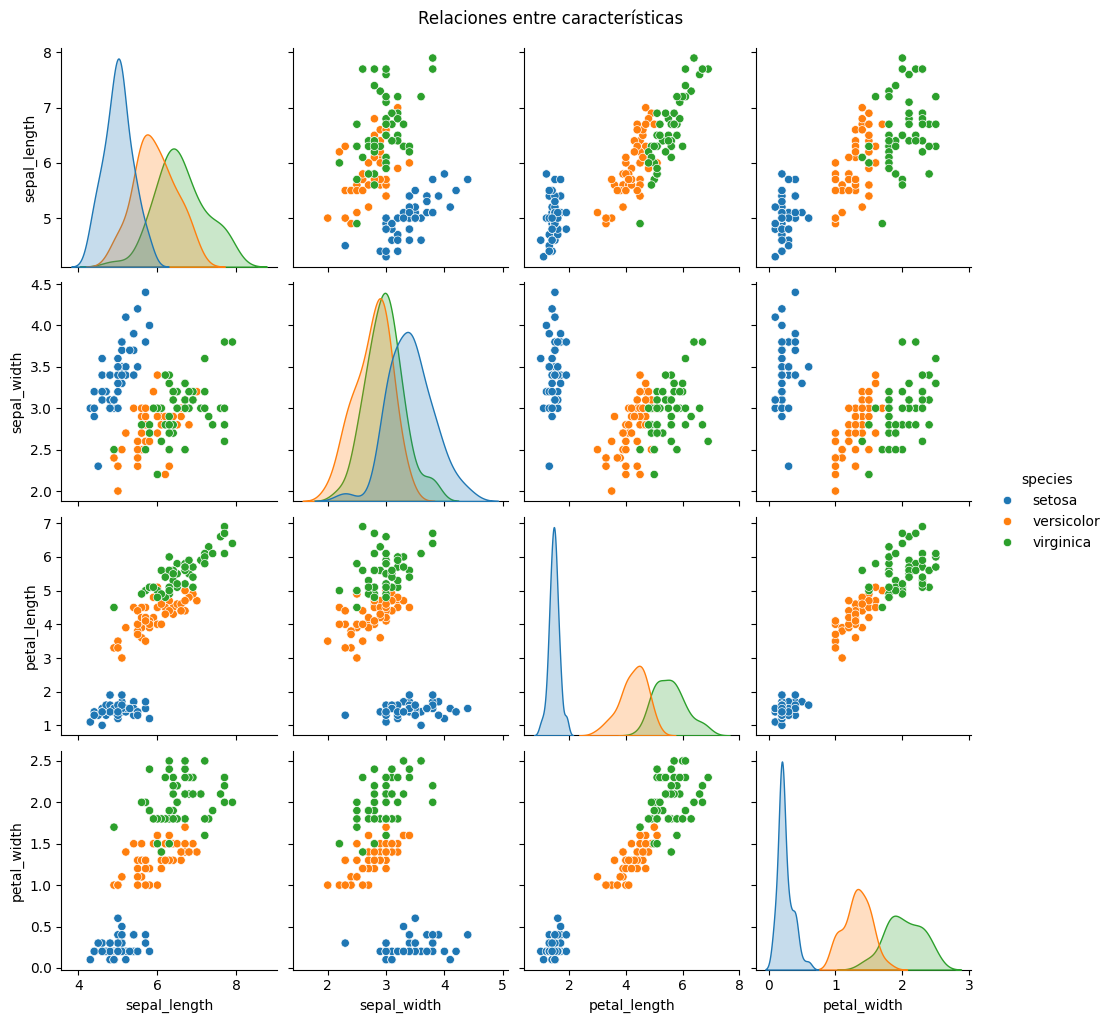

In [10]:
sns.pairplot(df, hue='species')
plt.suptitle("Relaciones entre características", y=1.02)
plt.show()

##### 2. Matriz de correlación para detectar relaciones lineales entre variables numéricas

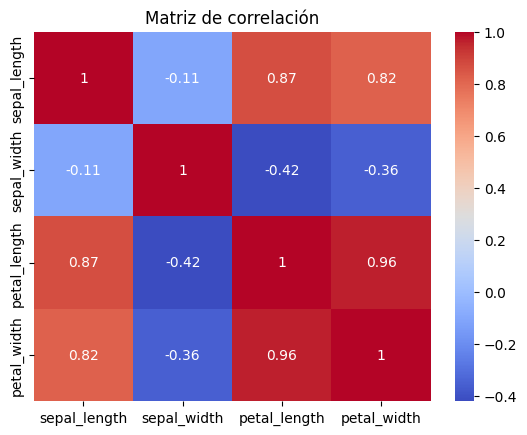

In [12]:
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


#### Data Cleaning

In [13]:
df.duplicated().sum()

np.int64(3)

In [14]:
df = df.drop_duplicates()

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

C:\Users\Student\AppData\Local\Temp\ipykernel_9492\3044365094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species_encoded'] = le.fit_transform(df['species'])


In [26]:
X = df.drop(['species', 'species_encoded'], axis=1)  # variables predictoras
y = df['species_encoded']  # variable objetivo

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

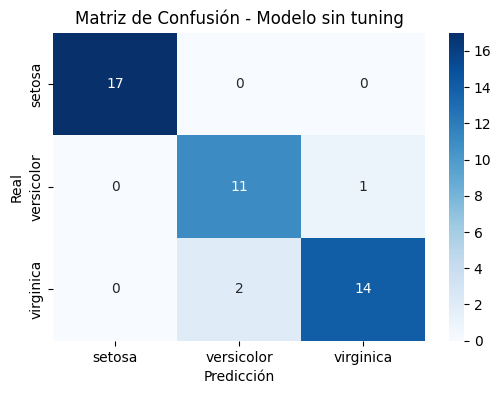

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title("Matriz de Confusión - Modelo sin tuning")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [32]:
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,17.000000
versicolor,0.846154,0.916667,0.880000,12.000000
virginica,0.933333,0.875000,0.903226,16.000000
accuracy,0.933333,0.933333,0.933333,0.933333
macro avg,0.926496,0.930556,0.927742,45.000000
weighted avg,0.935271,0.933333,0.933591,45.000000


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                    param_grid,
                    cv=5, 
                    scoring='accuracy'
                    )


grid_search.fit(X_train, y_train)


best_tree= grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)



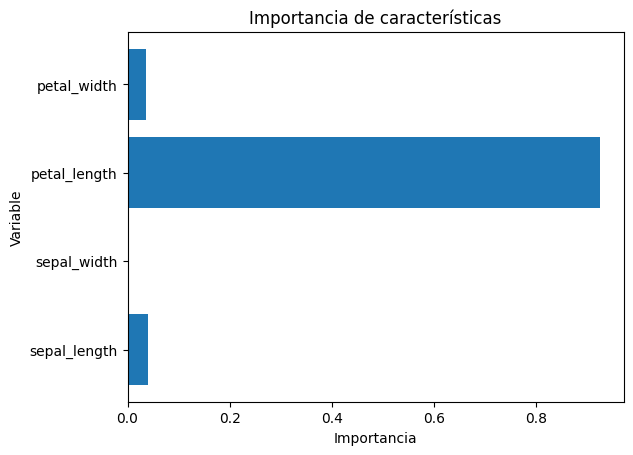

In [34]:
importances = best_tree.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Importancia de características")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

##### Luego de entrenar el modelo de Random Forest, se obtuvo la importancia relativa de cada característica. con esto se permite interpretar qué variables influyen más en la predicción de la especie de flor.


In [ ]:
import pandas as pd

model_results = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión (Tuned)', 'Random Forest (Tuned)'],
    'Accuracy': [0.95, 0.97, 0.98],
    'F1-Score': [0.94, 0.96, 0.97]
})

model_results


,Modelo,Accuracy,F1-Score
0,Regresión Logística,0.95,0.94
1,Árbol de Decisión (Tuned),0.97,0.96
2,Random Forest (Tuned),0.98,0.97
